### Random Forest

#### Bagging
A continuación veremos un conjunto de métodos de clasificación conocidos como ensambles cuya idea es mejorar la predicción de clasificadores débiles o inestables mediante el promedio o el promedio ponderado de estos. El primero en estudio es Bagging, un caso en particular de los Random Forest en donde se consideran todos los features para realizar el proceso de particionamiento del espacio de las covariables.

Bootstrap agregation. Conocido popularmente como Bagging promedia la predicción sobre una colección de muestras Boostrap, reduciendo de esta manera la varianza.

El estimador Bagging es definido por:
$$
\hat{f}_{bag}(x)=\dfrac{1}{B} \sum_{b=1}^{B}f^{*b}
$$


Bagging puede reducir drásticamente la varianza de clasificadores inestables como árboles, lo que conduce a una mejor predicción. Un argumento simple muestra por qué Bagging ayuda a bajar la pérdida por el error cuadrático, en resumen, porque el promedio reduce la varianza y deja el sesgo sin cambios.

Suponga que nuestras observaciones de entrenamiento $(x_i, y_i)$, $i = 1, ..., N$ se extraen independientemente de una distribución $\mathcal{P}$, y considere el estimador ideal  $f_{bag}= E_\mathcal{P}[\hat{f}^{*}(x)]$. Aquí x es fijo y el conjunto de datos bootstrap consta de observaciones $(x^∗_i, y^∗_i)$, $i = 1, 2, ..., N$ muestreados de $\mathcal{P}$. Note que $f_{bag}(x)$ es un estimador bagging extrayendo muestras Bootstrap de la población real $\mathcal{P}$ en lugar de los datos.

$$
\begin{eqnarray}
E_{\mathcal{P}}[Y-\hat{f}^*(x)]^2&=&E_{\mathcal{P}}[Y-f_{bag}(x)+f_{bag}(x)-\hat{f}^*(x)]^2\\
&=&E_{\mathcal{P}}[Y-f_{bag}(x)]^2+E_{\mathcal{P}}[\hat{f}^*(x) - f_{bag}(x)]^2\\
&\geq&E_{\mathcal{P}}[Y-f_{bag}(x)]^2
\end{eqnarray} 
$$

El error adicional en el lado derecho proviene de la varianza de $\hat{f}^∗(x)$ alrededor de su media  $f_{bag}(x)$. Por lo tanto, la verdadera población nunca aumenta el error cuadrático medio. Esto sugiere que bagging, extrayendo muestras a partir de los datos de entrenamiento, a menudo disminuirá el error cuadrático medio.

#### Algoritmo
Agregación Boostrap (Bagging)
Sea $M$ el número de predictores requeridos.
1. X=$\{(x_1,y_1),...(x_N,y_N)\}$
2. Para i=1 hasta M(número de predictores) hacer
 * Generar una nueva muestra boostrap $X_{bag}$ (muestras con reemplazo de tamaño N de X) 
 * Entrenamos un estimador $f_i$ con la muestra $X_{bag}$ y lo agregamos al ensamble. 
3. Terminamos 
4.  Para cada observación de la muestra de prueba, el estimador Bagging estará dado por $f_{bag}=\dfrac{1}{M}\sum_i^Mf_i(x)$. En el caso de regresión el estimador Bagingg será la media de cada uno de ellos sin embargo en el caso de clasificación el valor de la clase estimada será el valor con mayor votos de los arboles.

<img src="trees.png">

In [70]:
from   sklearn.ensemble        import BaggingClassifier,RandomForestClassifier
from   sklearn.model_selection import train_test_split
from   sklearn                 import tree
from   sklearn.metrics         import accuracy_score
import pandas                  as     pd
import matplotlib.pylab        as     plt
from   sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [71]:
data=pd.read_csv('coris.csv',sep=',',header=0)
data.shape
data.head(2)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1


In [72]:
y=data.pop("chd")
X=data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [74]:
seed=7
cart=tree.DecisionTreeClassifier(max_depth=7)
n_trees=62
baggingModel=BaggingClassifier(base_estimator=cart,n_estimators=n_trees,random_state=seed)
baggingModel.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [75]:
y_bag=baggingModel.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,y_bag))
print('número de datos bien clasificados')
accuracy_score(y_test,y_bag,normalize=False)

Porcentaje de datos bien clasificados
0.6546762589928058
número de datos bien clasificados


91

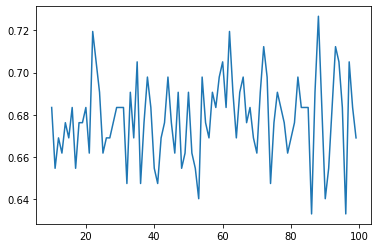

In [76]:
trees=[i for i in range(10,100,1)]
max_dept=[4,5,7,9]
ac=[]
for i in trees:
    cart=tree.DecisionTreeClassifier(max_depth=7)
    baggingModel=BaggingClassifier(base_estimator=cart,n_estimators=i)
    baggingModel.fit(X_train,y_train)
    y_bag=baggingModel.predict(X_test)
    ac.append(accuracy_score(y_test,y_bag))
    
plt.plot(trees,ac)    

In [98]:
max_samp=np.arange(0.1, 1.1, 0.1)
accuaracy=[]
#boostrap vs accuracy  

### Hiperparámetros
1. $\textit{max_features}$. El número de features a extraer de $X$ para entrenar cada estimador base (sin reemplazo por defecto).
2. $\textit{max_samples}$. El número de muestras a extraer de X para entrenar cada estimador base (con reemplazo por defecto).

In [77]:
param_grid = {
    'base_estimator__max_depth' : [4,5,7,9,11],
    #'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'n_estimators' :[i for i in range(10,100,1)],
    'base_estimator__criterion':["gini", "entropy"],
    #'max_features':[0.5,1]
}

clf = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()),param_grid, scoring = 'accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 5,
 'n_estimators': 61}

In [78]:
y_bag=clf.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,y_bag))
print('número de datos bien clasificados')
accuracy_score(y_test,y_bag,normalize=False)

Porcentaje de datos bien clasificados
0.7050359712230215
número de datos bien clasificados


98

#### Random Forest
* Util para regresión y clasificación.
* Un grupo de modelos "débiles", se combinan en un modelo robusto.
* Sirve como una técnica para reducción de la dimensionalidad.
* Se generan múltiples árboles. Cada árbol da una classificación (vota por una clase). Y el resultado es la clase con mayor número de votos en todo el bosque (forest).
* Para regresión, se toma el promedio de las salidas (predicciones) de todos los árboles.
<img src="random.jpeg" width="200px">

####  Ventajas y desventajas de Random Forest

##### Ventajas
* Existen muy pocas suposiciones sobre los datos
* Puede manejar hasta miles de variables de entrada e identificar las más significativas. Método de reducción de dimensionalidad.
* Una de las salidas del modelo es la importancia de variables.
* Es posible usarlo como método no supervisado y detección de outliers.
##### Desventajas
* Pérdida de interpretación
* Bueno para clasificación, no tanto para regresión. 
* Poco control en lo que hace el modelo 

In [99]:
randomForest = RandomForestClassifier(max_depth=7,n_estimators=100, random_state=0)
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [100]:
y_forest=randomForest.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,y_bag))
print('número de datos bien clasificados')
accuracy_score(y_test,y_forest,normalize=False)

Porcentaje de datos bien clasificados
0.6330935251798561
número de datos bien clasificados


96

In [65]:
param_grid = {
    'max_depth' : [4,5,7,9,11],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'n_estimators' :[i for i in range(10,200,1)],
    'criterion':["gini", "entropy"],
    'max_features':['auto', 'sqrt']
}

clf_rfhiper = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid, scoring = 'accuracy')
clf_rfhiper.fit(X_train, y_train)
clf_rfhiper.best_params_

{'n_estimators': 137,
 'max_samples': 0.05,
 'max_features': 'sqrt',
 'max_depth': 4,
 'criterion': 'entropy'}

In [66]:
y_clf_rfhiper=clf_rfhiper.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,y_clf_rfhiper))
print('número de datos bien clasificados')
accuracy_score(y_test,y_clf_rfhiper,normalize=False)

Porcentaje de datos bien clasificados
0.697841726618705
número de datos bien clasificados


97